In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D,Dropout,Flatten
from keras.models import sequential
from keras.preprocessing import image
import tensorflow as tf


In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
train_data = train_datagen.flow_from_directory( directory= '/content/drive/MyDrive/OralS1/train',
    target_size = (256,256),
    batch_size = 10,
                                               
    class_mode = 'binary')

Found 76 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cancer': 0, 'non-cancer': 1}

In [ ]:
val_datagen = image.ImageDataGenerator(rescale = 1/255)
val_data = val_datagen.flow_from_directory( directory= '/content/drive/MyDrive/OralS1/val',
    target_size = (256,256),
    batch_size = 10,
    class_mode = 'binary')

Found 53 images belonging to 2 classes.


In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.engine.sequential import Sequential
model=Sequential()




model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(16,(3,3),activation='relu'))
kernel_regularizer=keras.regularizers.l1()
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(BatchNormalization())

model.add(Conv2D(38,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(BatchNormalization())

#model.add(Dropout(0.25))


#model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
kernel_regularizer=keras.regularizers.l2(0.001)

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 8)       224       
                                                                 
 conv2d_34 (Conv2D)          (None, 252, 252, 16)      1168      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 126, 126, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 62, 62, 32)      

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
#model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_data,steps_per_epoch=8,epochs=25,validation_data=val_data)

Epoch 1/25
8/8 [==============================] - 4s 441ms/step - loss: 1.2522 - accuracy: 0.5132 - val_loss: 0.7498 - val_accuracy: 0.3396
Epoch 2/25
8/8 [==============================] - 3s 414ms/step - loss: 0.6688 - accuracy: 0.6053 - val_loss: 0.5882 - val_accuracy: 0.6604
Epoch 3/25
8/8 [==============================] - 3s 412ms/step - loss: 0.5885 - accuracy: 0.6579 - val_loss: 0.6534 - val_accuracy: 0.6604
Epoch 4/25
8/8 [==============================] - 3s 410ms/step - loss: 0.5907 - accuracy: 0.6579 - val_loss: 0.6224 - val_accuracy: 0.6604
Epoch 5/25
8/8 [==============================] - 3s 425ms/step - loss: 0.5502 - accuracy: 0.6579 - val_loss: 0.6436 - val_accuracy: 0.6604
Epoch 6/25
8/8 [==============================] - 3s 457ms/step - loss: 0.5511 - accuracy: 0.7368 - val_loss: 0.5884 - val_accuracy: 0.6792
Epoch 7/25
8/8 [==============================] - 3s 410ms/step - loss: 0.4825 - accuracy: 0.7368 - val_loss: 0.7955 - val_accuracy: 0.6604
Epoch 8/25
8/8 [====

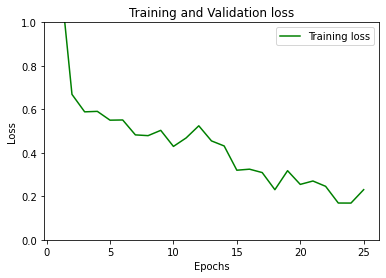

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'r', label='validation loss')
plt.title('Training and Validation loss')
plt.ylim([0,1.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

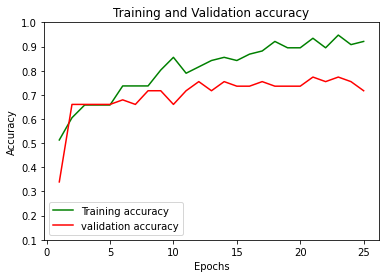

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'r', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.ylim(0.1,1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1, 256, 256, 3)

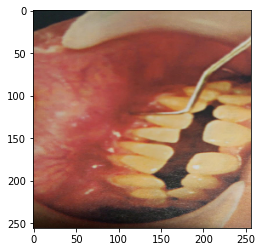

In [ ]:
path="/content/drive/MyDrive/d09a9b5c-a0b1-488f-9d50-2937fe578a7e.jpg"
img=image.load_img(path,target_size=(256,256,3))
img=image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [ ]:
(model.predict(img) > 0.5).astype("int32")


array([[0]], dtype=int32)

In [ ]:
train_data.class_indices

{'cancer': 0, 'non-cancer': 1}

(1, 256, 256, 3)

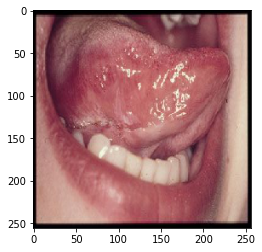

In [ ]:
path="/content/drive/MyDrive/41415_2000_Article_BF4800481_Fig1_HTML.jpg"
img=image.load_img(path,target_size=(256,256,3))
img=image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [ ]:
train_data.class_indices

{'cancer': 0, 'non-cancer': 1}

In [ ]:
(model.predict(img) > 0.5).astype("int32")
#model.predict(np.array(img))

array([[0]], dtype=int32)

(1, 256, 256, 3)

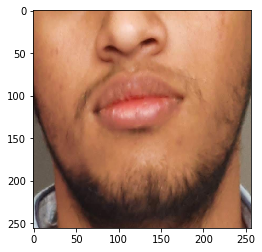

In [ ]:
path="/content/drive/MyDrive/20200314_1129242.jpg"
img=image.load_img(path,target_size=(256,256,3))
img=image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [ ]:
(model.predict(img) > 0.5).astype("int32")


array([[1]], dtype=int32)